In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import skew
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
njobs = 4
randomState = 0

In [2]:
# Get data
data = pd.read_csv("rawData/bank-additional-full.csv", sep = ";")
display(data.head())
print("Data dimensions : " + str(data.shape))
print("Data columns : " + str(data.columns))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no


Data dimensions : (41188, 21)
Data columns : Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [3]:
# Remove dots from column names
data.columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 
                'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
                'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']

In [4]:
# Quick look at the target variable
print("Target variable 'y' is yes or no -> classification problem")
print("Number of yes : " + str(data[data.y == "yes"].shape[0]))
print("Number of no : " + str(data[data.y == "no"].shape[0]))

# Encode it as integer for machine learning algorithms
data = data.replace({"y" : {"no" : 0, "yes" : 1}})

Target variable 'y' is yes or no -> classification problem
Number of yes : 4640
Number of no : 36548


In [5]:
# How to treat unknown labels?
print("There are several missing values in some categorical attributes, all coded with the 'unknown' label. These \
missing values can be treated as a possible class label or using deletion or imputation techniques.")

There are several missing values in some categorical attributes, all coded with the 'unknown' label. These missing values can be treated as a possible class label or using deletion or imputation techniques.


In [6]:
# Preprocess each variable
print("Preprocessing all variables : imputing missing values, encoding categorical variables in proper format")

Preprocessing all variables : imputing missing values, encoding categorical variables in proper format


NAs for age : 0


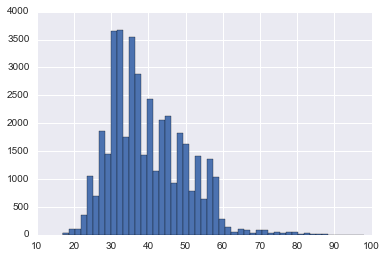

In [7]:
# age
data.age.hist(bins = 50)
print("NAs for age : " + str(data.age.isnull().values.sum()))

In [8]:
# job
print(data.job.value_counts())
print("NAs for job : " + str(data.job.isnull().values.sum()))
print("330 'unknown', impute most common value")
data.loc[data["job"] == "unknown", "job"] = "admin."

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
NAs for job : 0
330 'unknown', impute most common value


In [9]:
# marital
print(data.marital.value_counts())
print("NAs for marital : " + str(data.marital.isnull().values.sum()))
print("80 'unknown', impute most common value")
data.loc[data["marital"] == "unknown", "marital"] = "married"

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
NAs for marital : 0
80 'unknown', impute most common value


In [10]:
# education
print(data.education.value_counts())
print("NAs for education : " + str(data.education.isnull().values.sum()))
print("1731 'unknown', impute most common value")
data.loc[data["education"] == "unknown", "education"] = "university.degree"
print("basic.4y : left school at 10 years old")
print("basic.6y : left school at 12 years old")
print("basic.9y : left school at 15 years old")

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
NAs for education : 0
1731 'unknown', impute most common value
basic.4y : left school at 10 years old
basic.6y : left school at 12 years old
basic.9y : left school at 15 years old


In [11]:
# default
print(data.default.value_counts())
print("NAs for default : " + str(data.default.isnull().values.sum()))
print("8597 'unknown'")
print("Only 3 'yes' -> we'll discard this variable, not enough information in it")
data = data.drop(["default"], axis = 1)

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
NAs for default : 0
8597 'unknown'
Only 3 'yes' -> we'll discard this variable, not enough information in it


In [12]:
# housing
print(data.housing.value_counts())
print("NAs for housing : " + str(data.housing.isnull().values.sum()))
print("990 'unknown'. Since we have about same proportion of yes and no, let's impute NAs randomly")
data.loc[data["housing"] == "unknown", "housing"] = random.choice(["yes", "no"])

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
NAs for housing : 0
990 'unknown'. Since we have about same proportion of yes and no, let's impute NAs randomly


In [13]:
# loan
print(data.loan.value_counts())
print("NAs for loan : " + str(data.loan.isnull().values.sum()))
print("990 'unknown', impute most common value")
data.loc[data["loan"] == "unknown", "loan"] = "no"

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
NAs for loan : 0
990 'unknown', impute most common value


In [14]:
# contact
print(data.contact.value_counts())
print("NAs for contact : " + str(data.contact.isnull().values.sum()))

cellular     26144
telephone    15044
Name: contact, dtype: int64
NAs for contact : 0


In [15]:
# month
print(data.month.value_counts())
print("NAs for month : " + str(data.month.isnull().values.sum()))

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
NAs for month : 0


In [16]:
# day_of_week
print(data.day_of_week.value_counts())
print("NAs for day_of_week : " + str(data.day_of_week.isnull().values.sum()))

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64
NAs for day_of_week : 0


NAs for duration : 0
Important note:  this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
Removing it from data


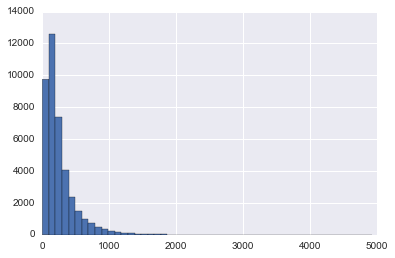

In [17]:
# duration
data.duration.hist(bins = 50)
print("NAs for duration : " + str(data.duration.isnull().values.sum()))
print("Important note:  this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the \
duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input \
should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive \
model.")
print("Removing it from data")
data = data.drop(["duration"], axis = 1)

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64
NAs for campaign : 0


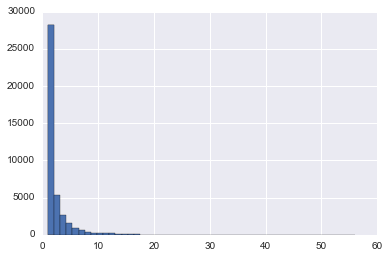

In [18]:
# campaign
print(data.campaign.value_counts())
data.campaign.hist(bins = 50)
print("NAs for campaign : " + str(data.campaign.isnull().values.sum()))

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64
NAs for pdays : 0
999 means client was not previously contacted


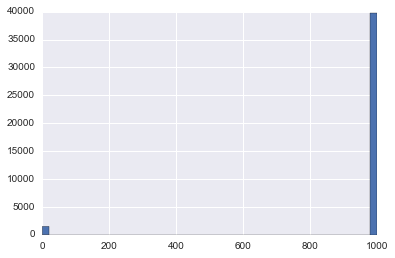

In [19]:
# pdays
data.pdays.hist(bins = 50)
print(data.pdays.value_counts())
print("NAs for pdays : " + str(data.pdays.isnull().values.sum()))
print("999 means client was not previously contacted")
#print("Skews heavily the distribution. We'll transform 999 into 5, about twice the biggest normal value")
#data.loc[data["pdays"] == 999, "pdays"] = 50
#data.pdays.hist(bins = 50)

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64
NAs for previous : 0


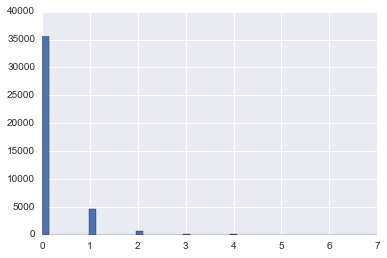

In [20]:
# previous
data.previous.hist(bins = 50)
print(data.previous.value_counts())
print("NAs for previous : " + str(data.previous.isnull().values.sum()))

In [21]:
# poutcome
print(data.poutcome.value_counts())
print("NAs for poutcome : " + str(data.poutcome.isnull().values.sum()))

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
NAs for poutcome : 0


NAs for emp_var_rate : 0


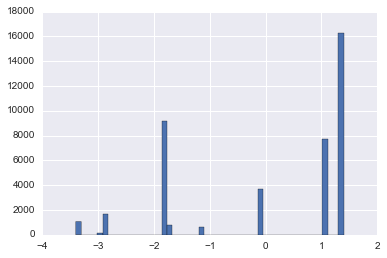

In [22]:
# emp_var_rate
data.emp_var_rate.hist(bins = 50)
print("NAs for emp_var_rate : " + str(data.emp_var_rate.isnull().values.sum()))

NAs for cons_price_idx : 0


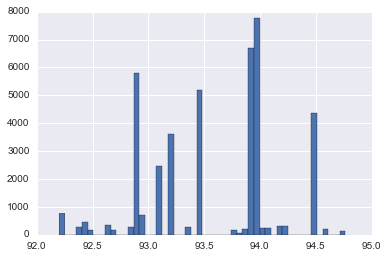

In [23]:
# cons_price_idx
data.cons_price_idx.hist(bins = 50)
print("NAs for cons_price_idx : " + str(data.cons_price_idx.isnull().values.sum()))

NAs for cons_conf_idx : 0


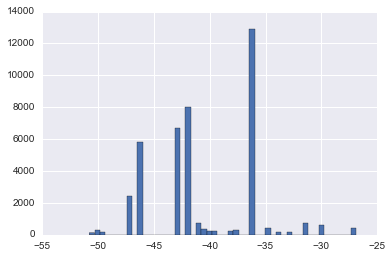

In [24]:
# cons_conf_idx
data.cons_conf_idx.hist(bins = 50)
print("NAs for cons_conf_idx : " + str(data.cons_conf_idx.isnull().values.sum()))

NAs for euribor3m : 0


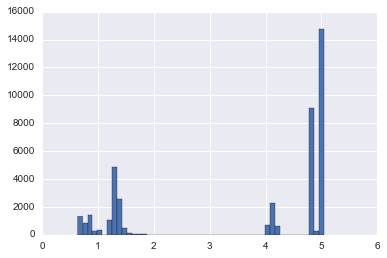

In [25]:
# euribor3m
data.euribor3m.hist(bins = 50)
print("NAs for euribor3m : " + str(data.euribor3m.isnull().values.sum()))

NAs for nr_employed : 0


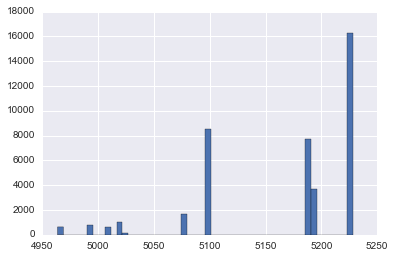

In [26]:
# nr_employed
data.nr_employed.hist(bins = 50)
print("NAs for nr_employed : " + str(data.nr_employed.isnull().values.sum()))

In [27]:
# Encode some categorical features as ordered numbers when there is information in the order
data = data.replace({"education" : {"illiterate" : 1, "basic.4y" : 2, "basic.6y" : 3, "basic.9y" : 4, "high.school" : 5, 
                                    "professional.course" : 6, "university.degree" : 7}})

In [28]:
# Create new features
# 1* Simplifications of existing features
data["smplJob"] = data.job.replace({"retired" : 1, "student" : 1, "unemployed" : 1,
                                    "admin." : 2, "blue-collar" : 2, "entrepreneur" : 2, "housemaid" : 2, 
                                    "management" : 2, "self-employed" : 2, "services" : 2, "technician" : 2
                                   })# 1 : not working, 2 : working
data["smplMarital"] = data.marital.replace({"married" : 1, 
                                            "single" : 2, "divorced" : 2 
                                           })# 1 : married, 2 : not married                                                    
data["smplEducation"] = data.education.replace({1 : 1, 2 : 1, 3 : 1, 4 : 1,
                                                5 : 2, 
                                                6 : 3, 7 : 3
                                   })# 1 : noEduc, 2 : HS, 3 : superior
data["smplMonth"] = data.month.replace({"dec" : 1, "jan" : 1, "feb" : 1,
                                        "mar" : 2, "apr" : 2, "may" : 2, 
                                        "jun" : 3, "jul" : 3, "aug" : 3,
                                        "sep" : 4, "oct" : 4, "nov" : 4
                                   })# 1 : winter, 2 : spring, 3 : summer, 4 : fall
data["smplAge"] = data.age.copy()
data.loc[data["age"] < 30, "smplAge"] = 1
data.loc[(data["age"] >= 30) & (data["age"] < 40), "smplAge"] = 2
data.loc[(data["age"] >= 40) & (data["age"] < 50), "smplAge"] = 3
data.loc[(data["age"] >= 50) & (data["age"] < 60), "smplAge"] = 4
data.loc[data["age"] >= 60, "smplAge"] = 5
data["smplCampaign"] = data.campaign.copy()
data.loc[data["campaign"] == 1, "smplCampaign"] = 1
data.loc[data["campaign"] == 2, "smplCampaign"] = 2
data.loc[(data["campaign"] >= 3) & (data["campaign"] <= 5), "smplCampaign"] = 3
data.loc[data["campaign"] >= 6, "smplCampaign"] = 4
data["smplPdays"] = data.pdays.copy()
data.loc[data["pdays"] == 999, "smplPdays"] = 1 # never contacted
data.loc[data["pdays"] < 7, "smplPdays"] = 2 # contacted less than a week ago (5 working days)
data.loc[(data["pdays"] >= 7) & (data["pdays"] < 14), "smplPdays"] = 3 # contacted less than 2 weeks ago
data.loc[data["pdays"] >= 14, "smplPdays"] = 4
data["smplPrevious"] = data.previous.copy()
data.loc[data["previous"] == 0, "smplPrevious"] = 1
data.loc[data["previous"] == 1, "smplPrevious"] = 2
data.loc[data["previous"] >= 2, "smplPrevious"] = 3
data["smplEmp_var_rate"] = data.emp_var_rate.copy()
data.loc[data["emp_var_rate"] <= -1, "smplEmp_var_rate"] = 1
data.loc[(data["emp_var_rate"] > -1) & (data["emp_var_rate"] < 1), "smplEmp_var_rate"] = 2
data.loc[data["emp_var_rate"] >= 1, "smplEmp_var_rate"] = 3
data["smplEuribor3m"] = data.euribor3m.copy()
data.loc[data["euribor3m"] <= 3, "smplEuribor3m"] = 1
data.loc[data["euribor3m"] > 3, "smplEuribor3m"] = 2
data["smplNr_employed"] = data.nr_employed.copy()
data.loc[data["nr_employed"] <= 5050, "smplNr_employed"] = 1
data.loc[(data["nr_employed"] > 5050) & (data["nr_employed"] < 5150), "smplNr_employed"] = 2
data.loc[data["nr_employed"] >= 5150, "smplNr_employed"] = 3


In [29]:
# 2* Combinations of existing features
# Combo of age and education should be a good proxy for wealth
data["smplAge*education"] = data["smplAge"] * data["education"]

In [30]:
print(data.shape)
display(data.head())

(41188, 31)


,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,...,smplEducation,smplMonth,smplAge,smplCampaign,smplPdays,smplPrevious,smplEmp_var_rate,smplEuribor3m,smplNr_employed,smplAge*education
0,56,housemaid,married,2,no,no,telephone,may,mon,1,...,1,2,4,1,4,1,3.000,2.000,3.000,8
1,57,services,married,5,no,no,telephone,may,mon,1,...,2,2,4,1,4,1,3.000,2.000,3.000,20
2,37,services,married,5,yes,no,telephone,may,mon,1,...,2,2,2,1,4,1,3.000,2.000,3.000,10
3,40,admin.,married,3,no,no,telephone,may,mon,1,...,1,2,3,1,4,1,3.000,2.000,3.000,9
4,56,services,married,5,no,yes,telephone,may,mon,1,...,2,2,4,1,4,1,3.000,2.000,3.000,20


In [31]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = abs(data.corr())
corr.sort_values(["y"], ascending = False, inplace = True)
print(corr.y)
print("No strong predictor so far")

Find most important features relative to target
y                   1.000
smplNr_employed     0.366
nr_employed         0.355
pdays               0.325
smplPdays           0.313
euribor3m           0.308
emp_var_rate        0.298
smplEuribor3m       0.291
smplEmp_var_rate    0.282
previous            0.230
smplPrevious        0.226
cons_price_idx      0.136
smplJob             0.121
campaign            0.066
smplCampaign        0.065
smplEducation       0.060
education           0.055
cons_conf_idx       0.055
smplMonth           0.050
smplMarital         0.043
smplAge*education   0.036
age                 0.030
smplAge             0.017
Name: y, dtype: float64
No strong predictor so far


In [32]:
# 3* Polynomials on the top 10 existing features
data["smplNr_employed-s2"] = data["smplNr_employed"] ** 2
data["smplNr_employed-s3"] = data["smplNr_employed"] ** 3
data["smplNr_employed-Sq"] = np.sqrt(data["smplNr_employed"])
data["nr_employed-s2"] = data["nr_employed"] ** 2
data["nr_employed-s3"] = data["nr_employed"] ** 3
data["nr_employed-Sq"] = np.sqrt(data["nr_employed"])
data["pdays-s2"] = data["pdays"] ** 2
data["pdays-s3"] = data["pdays"] ** 3
data["pdays-Sq"] = np.sqrt(data["pdays"])
data["smplPdays-s2"] = data["smplPdays"] ** 2
data["smplPdays-s3"] = data["smplPdays"] ** 3
data["smplPdays-Sq"] = np.sqrt(data["smplPdays"])
data["euribor3m-s2"] = data["euribor3m"] ** 2
data["euribor3m-s3"] = data["euribor3m"] ** 3
data["euribor3m-Sq"] = np.sqrt(data["euribor3m"])
data["emp_var_rate-s2"] = data["emp_var_rate"] ** 2
data["emp_var_rate-s3"] = data["emp_var_rate"] ** 3
data["emp_var_rate-Sq"] = np.sqrt(data["emp_var_rate"])
data["smplEuribor3m-s2"] = data["smplEuribor3m"] ** 2
data["smplEuribor3m-s3"] = data["smplEuribor3m"] ** 3
data["smplEuribor3m-Sq"] = np.sqrt(data["smplEuribor3m"])
data["smplEmp_var_rate-s2"] = data["smplEmp_var_rate"] ** 2
data["smplEmp_var_rate-s3"] = data["smplEmp_var_rate"] ** 3
data["smplEmp_var_rate-Sq"] = np.sqrt(data["smplEmp_var_rate"])
data["previous-s2"] = data["previous"] ** 2
data["previous-s3"] = data["previous"] ** 3
data["previous-Sq"] = np.sqrt(data["previous"])
data["smplPrevious-s2"] = data["smplPrevious"] ** 2
data["smplPrevious-s3"] = data["smplPrevious"] ** 3
data["smplPrevious-Sq"] = np.sqrt(data["smplPrevious"])


In [33]:
# 4* Cross-products on the top 10 existing features
data["smplNr_employed*nr_employed"] = data["smplNr_employed"] * data["nr_employed"]
data["smplNr_employed*pdays"] = data["smplNr_employed"] * data["pdays"]
data["smplNr_employed*smplPdays"] = data["smplNr_employed"] * data["smplPdays"]
data["smplNr_employed*euribor3m"] = data["smplNr_employed"] * data["euribor3m"]
data["smplNr_employed*emp_var_rate"] = data["smplNr_employed"] * data["emp_var_rate"]
data["smplNr_employed*smplEuribor3m"] = data["smplNr_employed"] * data["smplEuribor3m"]
data["smplNr_employed*smplEmp_var_rate"] = data["smplNr_employed"] * data["smplEmp_var_rate"]
data["smplNr_employed*previous"] = data["smplNr_employed"] * data["previous"]
data["smplNr_employed*smplPrevious"] = data["smplNr_employed"] * data["smplPrevious"]
data["nr_employed*pdays"] = data["nr_employed"] * data["pdays"]
data["nr_employed*smplPdays"] = data["nr_employed"] * data["smplPdays"]
data["nr_employed*euribor3m"] = data["nr_employed"] * data["euribor3m"]
data["nr_employed*emp_var_rate"] = data["nr_employed"] * data["emp_var_rate"]
data["nr_employed*smplEuribor3m"] = data["nr_employed"] * data["smplEuribor3m"]
data["nr_employed*smplEmp_var_rate"] = data["nr_employed"] * data["smplEmp_var_rate"]
data["nr_employed*previous"] = data["nr_employed"] * data["previous"]
data["nr_employed*smplPrevious"] = data["nr_employed"] * data["smplPrevious"]
data["pdays*smplPdays"] = data["pdays"] * data["smplPdays"]
data["pdays*euribor3m"] = data["pdays"] * data["euribor3m"]
data["pdays*emp_var_rate"] = data["pdays"] * data["emp_var_rate"]
data["pdays*smplEuribor3m"] = data["pdays"] * data["smplEuribor3m"]
data["pdays*smplEmp_var_rate"] = data["pdays"] * data["smplEmp_var_rate"]
data["pdays*previous"] = data["pdays"] * data["previous"]
data["pdays*smplPrevious"] = data["pdays"] * data["smplPrevious"]
data["smplPdays*euribor3m"] = data["smplPdays"] * data["euribor3m"]
data["smplPdays*emp_var_rate"] = data["smplPdays"] * data["emp_var_rate"]
data["smplPdays*smplEuribor3m"] = data["smplPdays"] * data["smplEuribor3m"]
data["smplPdays*smplEmp_var_rate"] = data["smplPdays"] * data["smplEmp_var_rate"]
data["smplPdays*previous"] = data["smplPdays"] * data["previous"]
data["smplPdays*smplPrevious"] = data["smplPdays"] * data["smplPrevious"]
data["euribor3m*emp_var_rate"] = data["euribor3m"] * data["emp_var_rate"]
data["euribor3m*smplEuribor3m"] = data["euribor3m"] * data["smplEuribor3m"]
data["euribor3m*smplEmp_var_rate"] = data["euribor3m"] * data["smplEmp_var_rate"]
data["euribor3m*previous"] = data["euribor3m"] * data["previous"]
data["euribor3m*smplPrevious"] = data["euribor3m"] * data["smplPrevious"]
data["emp_var_rate*smplEuribor3m"] = data["emp_var_rate"] * data["smplEuribor3m"]
data["emp_var_rate*smplEmp_var_rate"] = data["emp_var_rate"] * data["smplEmp_var_rate"]
data["emp_var_rate*previous"] = data["emp_var_rate"] * data["previous"]
data["emp_var_rate*smplPrevious"] = data["emp_var_rate"] * data["smplPrevious"]
data["smplEuribor3m*smplEmp_var_rate"] = data["smplEuribor3m"] * data["smplEmp_var_rate"]
data["smplEuribor3m*previous"] = data["smplEuribor3m"] * data["previous"]
data["smplEuribor3m*smplPrevious"] = data["smplEuribor3m"] * data["smplPrevious"]
data["smplEmp_var_rate*previous"] = data["smplEmp_var_rate"] * data["previous"]
data["smplEmp_var_rate*smplPrevious"] = data["smplEmp_var_rate"] * data["smplPrevious"]
data["previous*smplPrevious"] = data["previous"] * data["smplPrevious"]


In [34]:
# Updated most important features relative to target
print("Updated most important features relative to target")
corr = abs(data.corr())
corr.sort_values(["y"], ascending = False, inplace = True)
print(corr.y)
print("Almost all of the stronger predictors are new features")

Updated most important features relative to target
y                               1.000
smplNr_employed*pdays           0.402
smplNr_employed*smplPdays       0.389
smplNr_employed-Sq              0.375
smplNr_employed                 0.366
smplNr_employed*nr_employed     0.365
pdays*smplEuribor3m             0.358
nr_employed-Sq                  0.355
nr_employed                     0.355
nr_employed-s2                  0.354
nr_employed-s3                  0.353
nr_employed*smplPdays           0.348
smplNr_employed-s2              0.348
nr_employed*pdays               0.341
smplNr_employed-s3              0.331
smplPdays*smplEuribor3m         0.327
pdays*euribor3m                 0.327
pdays-Sq                        0.325
pdays*smplPdays                 0.325
pdays                           0.325
pdays-s2                        0.325
pdays-s3                        0.325
pdays*smplEmp_var_rate          0.324
smplNr_employed*smplEuribor3m   0.320
emp_var_rate*smplPrevious       0.320

In [35]:
# Differentiate numerical features (minus the target) and categorical features
y = data.y
categorical_features = data.select_dtypes(include = ["object"]).columns
numerical_features = data.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("y")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
data_num = data[numerical_features]
data_cat = data[categorical_features]

Numerical features : 97
Categorical features : 8


In [37]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features : " + str(data_num.isnull().values.sum()))
data_num = data_num.fillna(data_num.median())
print("Remaining NAs for numerical features : " + str(data_num.isnull().values.sum()))

NAs for numerical features : 17191
Remaining NAs for numerical features : 0


In [39]:
'''# Log transform of the skewed numerical features to lessen impact of outliers
# Normal distributions -> better learning
# As a general rule of thumb, a skewness with an absolute value > 0.75 is considered at least decently skewed
skewness = data_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.75]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
data_num[skewed_features] = np.log1p(data_num[skewed_features])'''

'# Log transform of the skewed numerical features to lessen impact of outliers\n# Normal distributions -> better learning\n# As a general rule of thumb, a skewness with an absolute value > 0.75 is considered at least decently skewed\nskewness = data_num.apply(lambda x: skew(x))\nskewness = skewness[abs(skewness) > 0.75]\nprint(str(skewness.shape[0]) + " skewed numerical features to log transform")\nskewed_features = skewness.index\ndata_num[skewed_features] = np.log1p(data_num[skewed_features])'

In [40]:
# Standardize numerical features
stdSc = StandardScaler()
data_num = pd.DataFrame(stdSc.fit_transform(data_num), columns = data_num.columns)

In [41]:
# Create dummy features for categorical values via one-hot encoding
data_cat = pd.get_dummies(data_cat)

In [42]:
# Join categorical and numerical features
data = pd.concat([data_num, data_cat], axis = 1)
print("New number of features : " + str(data.shape[1]))

New number of features : 135


In [43]:
# Write data in CSV files
data.to_csv("cleanData/data.csv", index = False)
y.to_csv("cleanData/y.csv", index = False)